In [20]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsort_keygen
from sklearn.metrics import pairwise_distances

In [16]:
datapath = '/Users/lindseytepfer/Documents/phd/inarr/behavioral_data/'
datalist = [x for x in os.listdir(datapath) if 'sub' in x]

In [15]:
read_list = []

for i in datalist:
    read_list.append(pd.read_csv(datapath+i))

df = pd.concat(read_list)
df = df[(df.target == 'physical') | (df.target == 'stutterer')]

In [16]:
pivoted = df.pivot_table(
    index=['subID', 'target', 'version'],
    columns='trait',
    values='response',
    aggfunc='first').reset_index()

In [17]:
pivoted.to_csv('behavioral_matrix.csv')

### Euclidean distances

In [17]:
df = pd.read_csv('behavioral_matrix.csv')
phys_df = df[(df.target == 'physical')].copy()
stut_df = df[(df.target == 'stutterer')].copy()

In [57]:
phys_df.sort_values(by=['version', 'subID'], key=natsort_keygen(), inplace=True)
phys_df.head()

,subID,target,version,bossy,conscientious,easygoing,humble,nosy,rebellious
0,1,physical,1,4,4,4,4,4,4
18,10,physical,1,7,2,2,3,6,6
24,13,physical,1,7,1,1,1,7,7
26,14,physical,1,7,7,1,1,7,7
32,17,physical,1,6,2,1,1,4,5


In [58]:
X = phys_df[['bossy','conscientious', 'easygoing', 'humble', 'nosy', 'rebellious']].values
distance_matrix = pairwise_distances(X, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, index=phys_df.index, columns=phys_df.index)

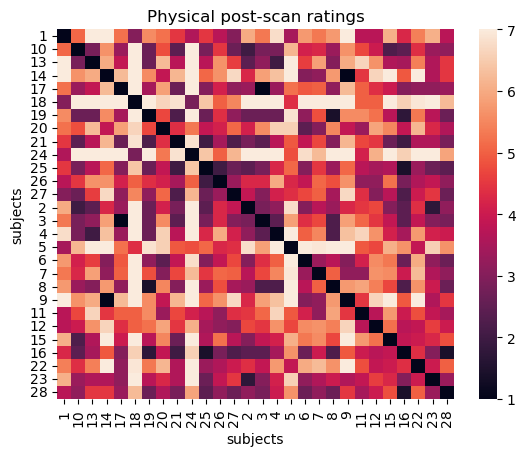

In [59]:
sns.heatmap(distance_df, vmin=1, vmax=7, xticklabels=phys_df.subID, yticklabels=phys_df.subID)
plt.title("Physical post-scan ratings")
plt.xlabel('subjects')
plt.ylabel('subjects')

plt.savefig("physical_rating_matrix.svg")

### Repeat the process for Stutterer

In [44]:
stut_df.sort_values(by=['version', 'subID'], key=natsort_keygen(), inplace=True)
stut_df.head()

,subID,target,version,bossy,conscientious,easygoing,humble,nosy,rebellious
1,1,stutterer,1,4,4,4,4,4,4
19,10,stutterer,1,1,7,5,7,1,1
25,13,stutterer,1,1,7,5,7,1,1
27,14,stutterer,1,1,7,2,7,1,1
33,17,stutterer,1,1,7,2,7,1,1


In [45]:
Xs = stut_df[['bossy','conscientious', 'easygoing', 'humble', 'nosy', 'rebellious']].values
stut_distance_matrix = pairwise_distances(Xs, metric='euclidean')
distance_df = pd.DataFrame(stut_distance_matrix, index=stut_df.index, columns=stut_df.index)

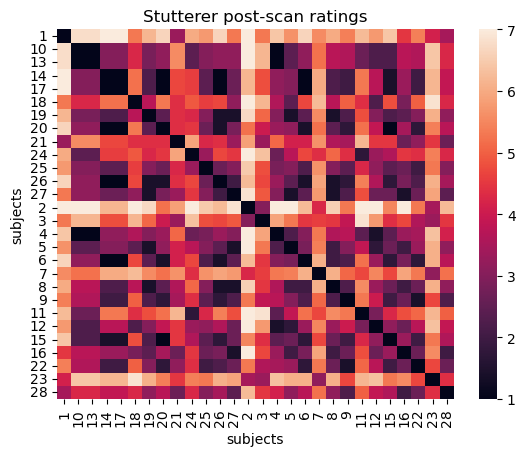

In [56]:
sns.heatmap(distance_df, vmin=1, vmax=7, xticklabels=stut_df.subID, yticklabels=stut_df.subID)
plt.title("Stutterer post-scan ratings")
plt.xlabel('subjects')
plt.ylabel('subjects')

plt.savefig("stutterer_rating_matrix.svg")

### Basic univariate plotting

In [40]:
df_phys = df[(df.target == 'physical')]
df_stut = df[(df.target == 'stutterer')]

melted_phys = pd.melt(df_phys,
id_vars=['subID', 'target', 'version'],
value_vars=['bossy', 'easygoing', 'humble', 'nosy', 'rebellious', 'conscientious'],
var_name='trait',
value_name='rating')
  
melted_stut = pd.melt(df_stut,
id_vars=['subID', 'target', 'version'],
value_vars=['bossy', 'easygoing', 'humble', 'nosy', 'rebellious', 'conscientious'],
var_name='trait',
value_name='rating')

Text(0.5, 1.0, 'Physical trait ratings')

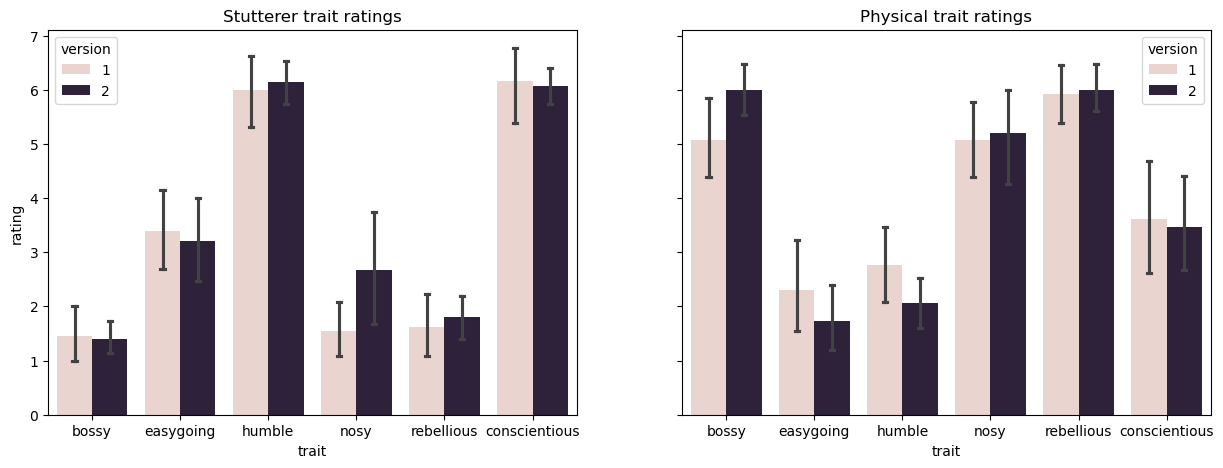

In [41]:
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True)

ax[0] = sns.barplot(data=melted_stut, x='trait', y='rating', hue='version', capsize=0.1, ax=ax[0])
ax[0].set_title("Stutterer trait ratings")

ax[1] = sns.barplot(data=melted_phys, x='trait', y='rating', hue='version', capsize=0.1, ax=ax[1])
ax[1].set_title("Physical trait ratings")


In [24]:
from moviepy.editor import VideoFileClip
from scipy.io import wavfile
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

In [49]:
inarr_clip_paths = "/Users/lindseytepfer/Documents/phd/inarr/app_stimuli/clips/"

im_clip = VideoFileClip(inarr_clip_paths+"physical-v1_clip_1.mp4")
im_removed_clip = VideoFileClip(inarr_clip_paths+"physical-v2_clip_1.mp4")
nim_clip = VideoFileClip("/Users/lindseytepfer/Documents/phd/inarr/figures/wave_files/physical-v1_clip_0_bungalow.mp4")

im_clip.audio.to_audiofile("im_clip_audio.wav")
im_removed_clip.audio.to_audiofile("im_removed_clip_audio.wav")
nim_clip.audio.to_audiofile("nim_clip_audio.wav")

MoviePy - Writing audio in im_clip_audio.wav


MoviePy - Done.
MoviePy - Writing audio in im_removed_clip_audio.wav


MoviePy - Done.
MoviePy - Writing audio in nim_clip_audio.wav


MoviePy - Done.


In [50]:
sample_rate1, im_clip_wav = wavfile.read("im_clip_audio.wav")
time_1 = np.arange(0, len(im_clip_wav)) / sample_rate1

sample_rate2, im_removed_clip_wav = wavfile.read("im_removed_clip_audio.wav")
time_2 = np.arange(0, len(im_removed_clip_wav)) / sample_rate2

sample_rate3, nim_clip_wav = wavfile.read("nim_clip_audio.wav")
time_3 = np.arange(0, len(nim_clip_wav)) / sample_rate3

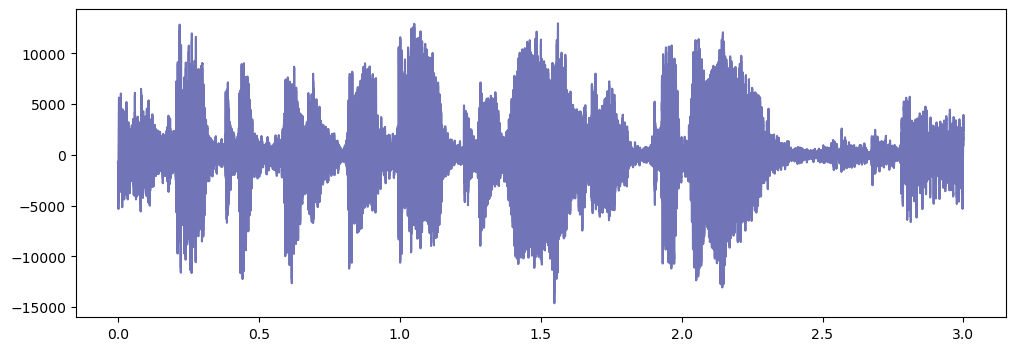

In [43]:
plt.figure(figsize=(12, 4))
plt.plot(time_1, im_clip_wav, color='#7174B6')

plt.savefig("internal_monologue_unmuted.svg")
plt.show()

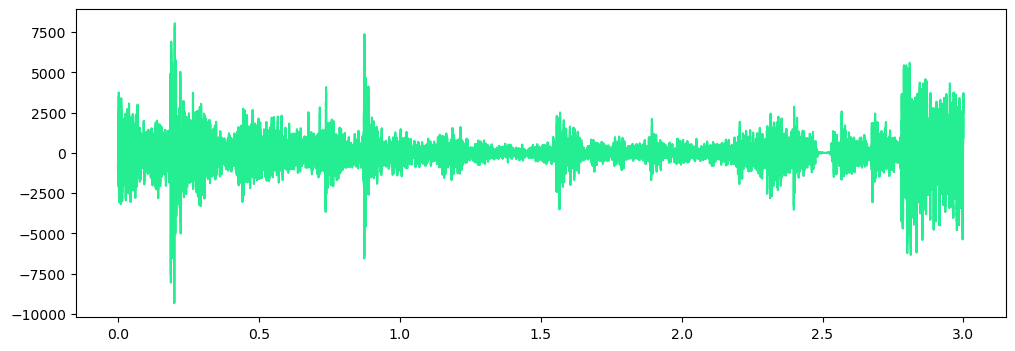

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(time_2, im_removed_clip_wav, color='#24ED92')
plt.savefig("internal_monologue_silenced.svg")
plt.show()

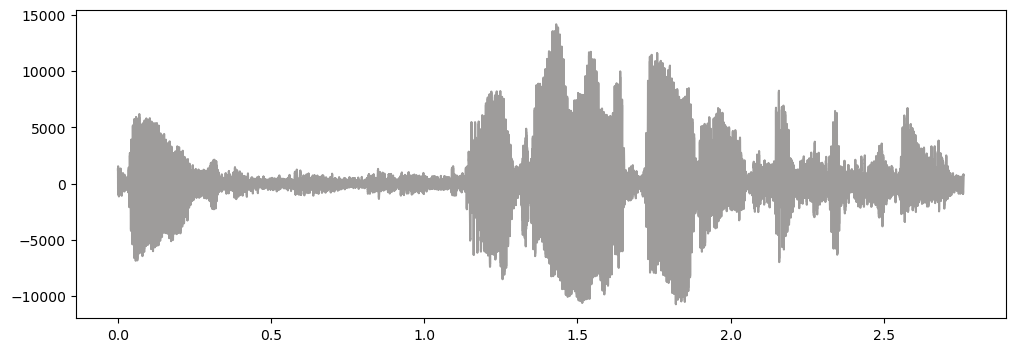

In [51]:
plt.figure(figsize=(12, 4))
plt.plot(time_3, nim_clip_wav, color='#9E9C9B')
plt.savefig("no_internal_monologue.svg")
plt.show()

In [ ]:
im_clip_audio = AudioSegment.from_mp3("im_clip_audio.mp3")
im_clip_audio.
